In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
mall_df = pd.read_csv("Mall_Customers.csv")

In [3]:
mall_df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


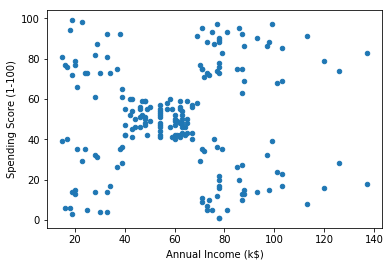

In [6]:
mall_df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)')

In [7]:
#sns.lmplot(x='Age', y='Spending Score (1-100)', hue = 'Gender', data = mall_df)

In [8]:
#sns.pairplot(mall_df, palette='inferno')

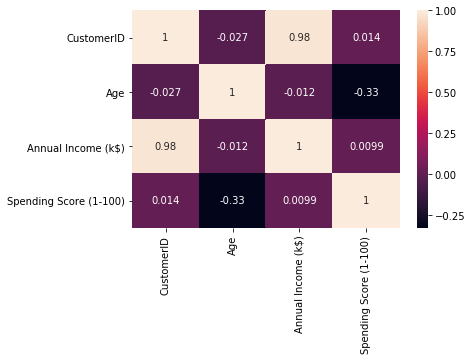

In [9]:
corr = mall_df.corr()
sns.heatmap(corr, annot = True)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)

In [11]:
# First, clustering based on Age and Spending Score

X1 = mall_df.loc[:,['Age', 'Spending Score (1-100)']]

In [12]:
X1.head(5)

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [13]:
mall_df['cluster_age'] = kmeans.fit_predict(X1)

In [14]:
for i in range(0,5):
    print(mall_df[mall_df['cluster_age'] == i].head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
1           2    Male   21                  15                      81   
3           4  Female   23                  16                      77   
5           6  Female   22                  17                      76   
7           8  Female   23                  18                      94   
9          10  Female   30                  19                      72   

   cluster_age  
1            0  
3            0  
5            0  
7            0  
9            0  
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
2            3  Female   20                  16                       6   
6            7  Female   35                  18                       6   
8            9    Male   64                  19                       3   
10          11    Male   67                  19                      14   
12          13  Female   58                  20                      15   

  

Text(0.5,1,'Clustering based on Age v/s Spending Score')

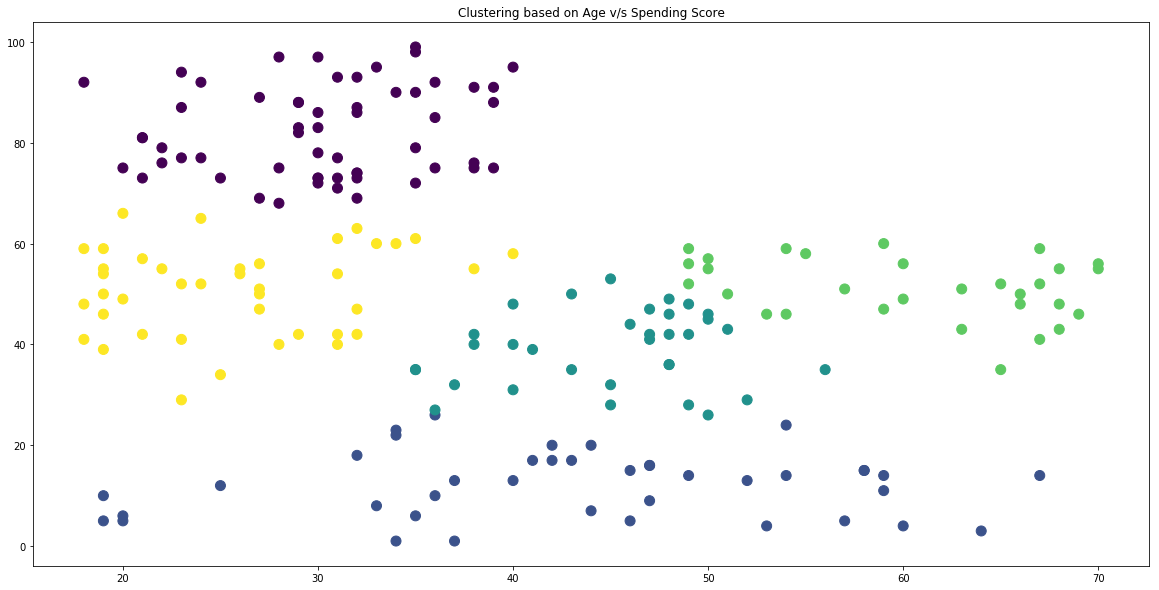

In [15]:
plt.pyplot.figure(figsize=(20,10))
label = mall_df['cluster_age'].unique()
plt.pyplot.scatter(x=mall_df['Age'], y = mall_df['Spending Score (1-100)'], c = mall_df['cluster_age'], s=100, label=label)
plt.pyplot.title('Clustering based on Age v/s Spending Score')

In [16]:
#X2 = mall_df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]

In [17]:
#mall_df['cluster_annual'] = kmeans.fit_predict(X2)

In [18]:
pd.set_option('display.max_columns', 500)
for i in range(0,5):
    print(mall_df[mall_df['cluster_annual'] == i][['Age','Annual Income (k$)', 'Spending Score (1-100)',  'cluster_annual']].head(5))

     Age  Annual Income (k$)  Spending Score (1-100)  cluster_annual
124   23                  70                      29               0
128   59                  71                      11               0
130   47                  71                       9               0
134   20                  73                       5               0
136   44                  73                       7               0
    Age  Annual Income (k$)  Spending Score (1-100)  cluster_annual
43   31                  39                      61               1
46   50                  40                      55               1
47   27                  40                      47               1
48   29                  40                      42               1
49   31                  40                      42               1
     Age  Annual Income (k$)  Spending Score (1-100)  cluster_annual
123   39                  69                      91               2
125   31                  70            

Text(0.5,1,'Clustering based on Annual v/s Spending Score')

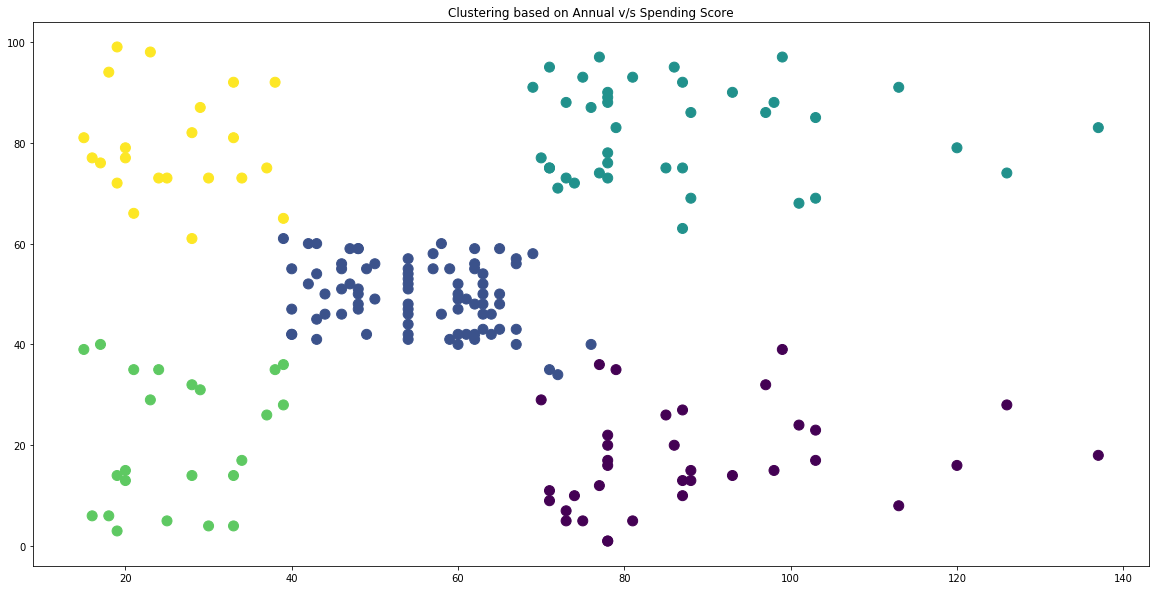

In [19]:
plt.pyplot.figure(figsize=(20,10))
label = mall_df['cluster_annual'].unique()
plt.pyplot.scatter(x=mall_df['Annual Income (k$)'], y = mall_df['Spending Score (1-100)'], c = mall_df['cluster_annual'], s=100)
plt.pyplot.title('Clustering based on Annual v/s Spending Score')

In [20]:
#Now let us combine Age, Annual Income and Spending Score to form a more hollistic cluster pattern
X = mall_df.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Text(0.5,1,'Age v/s Spending score based on overall clustering')

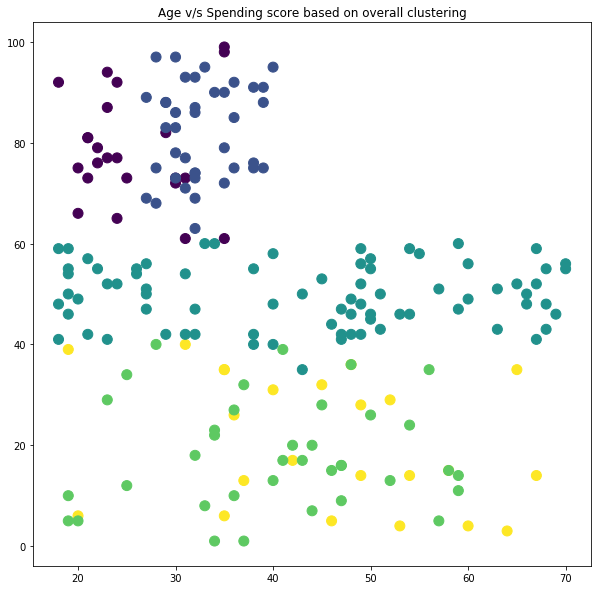

In [21]:
mall_df['cluster'] = kmeans.fit_predict(X)

plt.pyplot.figure(figsize=(10,10))
plt.pyplot.scatter(y= mall_df['Spending Score (1-100)'], x = mall_df['Age'], c = mall_df['cluster'], s = 100)
plt.pyplot.title('Age v/s Spending score based on overall clustering')

Text(0.5,1,'Annual Income v/s Spending score based on overall clustering')

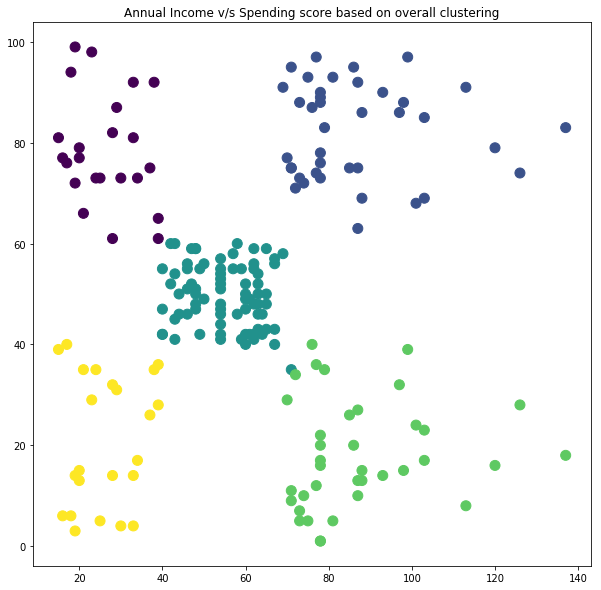

In [22]:
plt.pyplot.figure(figsize=(10,10))
plt.pyplot.scatter(y= mall_df['Spending Score (1-100)'], x = mall_df['Annual Income (k$)'], c = mall_df['cluster'], s = 100)
plt.pyplot.title('Annual Income v/s Spending score based on overall clustering')